<a href="https://colab.research.google.com/github/MiroshnitshenkoC/Data-Science-Miroshnitshenko-/blob/main/Proyecto_Latido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"miroshnitshenkoc","key":"81c5dd2b77b2e66151c99e7f572219b6"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install -q kaggle # instala kaggle en google colab y descarga el dataset pero random sample
!kaggle datasets download -d nih-chest-xrays/sample

Dataset URL: https://www.kaggle.com/datasets/nih-chest-xrays/sample
License(s): CC0-1.0
100% 4.18G/4.20G [01:00<00:00, 264MB/s]
100% 4.20G/4.20G [01:00<00:00, 74.6MB/s]


In [ ]:
# Extraer el zip en una carpeta
!unzip sample.zip -d chest_xray_sample

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: chest_xray_sample/sample/sample/images/00003124_000.png  
  inflating: chest_xray_sample/sample/sample/images/00003129_000.png  
  inflating: chest_xray_sample/sample/sample/images/00003129_001.png  
  inflating: chest_xray_sample/sample/sample/images/00003129_004.png  
  inflating: chest_xray_sample/sample/sample/images/00003129_009.png  
  inflating: chest_xray_sample/sample/sample/images/00003129_011.png  
  inflating: chest_xray_sample/sample/sample/images/00003135_000.png  
  inflating: chest_xray_sample/sample/sample/images/00003140_007.png  
  inflating: chest_xray_sample/sample/sample/images/00003159_001.png  
  inflating: chest_xray_sample/sample/sample/images/00003169_001.png  
  inflating: chest_xray_sample/sample/sample/images/00003177_002.png  
  inflating: chest_xray_sample/sample/sample/images/00003186_004.png  
  inflating: chest_xray_sample/sample/sample/images/00003186_005.png  
  inflatin

In [ ]:
import os #vamos a ver todos los archivos que se descomprimieron para encontrar el nombre correcto del archivo CSV
for root, dirs, files in os.walk(".", topdown=False):
    for name in files:
        print(os.path.join(root, name))


./.config/logs/2025.06.12/13.35.48.692010.log
./.config/logs/2025.06.12/13.35.49.978706.log
./.config/logs/2025.06.12/13.35.39.784909.log
./.config/logs/2025.06.12/13.35.59.537250.log
./.config/logs/2025.06.12/13.35.58.871934.log
./.config/logs/2025.06.12/13.35.19.246604.log
./.config/configurations/config_default
./.config/active_config
./.config/gce
./.config/.last_opt_in_prompt.yaml
./.config/.last_update_check.json
./.config/config_sentinel
./.config/default_configs.db
./.config/.last_survey_prompt.yaml
./.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
./chest_xray_sample/sample/images/00007390_012.png
./chest_xray_sample/sample/images/00018245_005.png
./chest_xray_sample/sample/images/00020673_048.png
./chest_xray_sample/sample/images/00006754_003.png
./chest_xray_sample/sample/images/00012304_008.png
./chest_xray_sample/sample/images/00018555_003.png
./chest_xray_sample/sample/images/00020373_004.png
./chest_xray_sample/sample/images/00003084_001.png
./ches

In [ ]:
#Explorar el contenido
# Primero descargar las librerías para visualización.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Leer el CSV con etiquetas
df = pd.read_csv("./chest_xray_sample/sample/sample_labels.csv")
print(df.head())


        Image Index                                     Finding Labels  \
0  00000013_005.png  Emphysema|Infiltration|Pleural_Thickening|Pneu...   
1  00000013_026.png                             Cardiomegaly|Emphysema   
2  00000017_001.png                                         No Finding   
3  00000030_001.png                                        Atelectasis   
4  00000032_001.png                        Cardiomegaly|Edema|Effusion   

   Follow-up #  Patient ID Patient Age Patient Gender View Position  \
0            5          13        060Y              M            AP   
1           26          13        057Y              M            AP   
2            1          17        077Y              M            AP   
3            1          30        079Y              M            PA   
4            1          32        055Y              F            AP   

   OriginalImageWidth  OriginalImageHeight  OriginalImagePixelSpacing_x  \
0                3056                 2544           

In [ ]:
from IPython.display import display
display(df.head(10))


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168
5,00000040_003.png,Consolidation|Mass,3,40,068Y,M,PA,2500,2048,0.168,0.168
6,00000042_002.png,No Finding,2,42,071Y,M,AP,3056,2544,0.139,0.139
7,00000057_001.png,No Finding,1,57,071Y,M,AP,3056,2544,0.139,0.139
8,00000061_002.png,Effusion,2,61,077Y,M,PA,2992,2991,0.143,0.143
9,00000061_019.png,No Finding,19,61,077Y,M,AP,3056,2544,0.139,0.139


In [ ]:
# Vamos a limpiar las columnas que no son necesarias para la primera clasificación binaria
df_filtrado = df[["Image Index", "Finding Labels", "Patient ID", "Patient Age", "Patient Gender", "View Position"]]

display(df_filtrado.head())


,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,13,060Y,M,AP
1,00000013_026.png,Cardiomegaly|Emphysema,13,057Y,M,AP
2,00000017_001.png,No Finding,17,077Y,M,AP
3,00000030_001.png,Atelectasis,30,079Y,M,PA
4,00000032_001.png,Cardiomegaly|Edema|Effusion,32,055Y,F,AP


In [ ]:
# Bueno ahora comenzamos a realizar limpieza y analisis exploratorio de datos.

print("------------------")
df_filtrado.info()
display(df_filtrado.head())
display(df_filtrado.tail())

df_filtrado.shape

------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Image Index     5606 non-null   object
 1   Finding Labels  5606 non-null   object
 2   Patient ID      5606 non-null   int64 
 3   Patient Age     5606 non-null   object
 4   Patient Gender  5606 non-null   object
 5   View Position   5606 non-null   object
dtypes: int64(1), object(5)
memory usage: 262.9+ KB


,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,13,060Y,M,AP
1,00000013_026.png,Cardiomegaly|Emphysema,13,057Y,M,AP
2,00000017_001.png,No Finding,17,077Y,M,AP
3,00000030_001.png,Atelectasis,30,079Y,M,PA
4,00000032_001.png,Cardiomegaly|Edema|Effusion,32,055Y,F,AP


,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
5601,00030712_000.png,No Finding,30712,058Y,M,PA
5602,00030786_005.png,Cardiomegaly|Effusion|Emphysema,30786,061Y,F,AP
5603,00030789_000.png,Infiltration,30789,052Y,F,PA
5604,00030792_000.png,No Finding,30792,010Y,F,PA
5605,00030797_000.png,No Finding,30797,024Y,M,PA


(5606, 6)

In [ ]:
# Ver que columnas tenemos, nombres y tipos de archivos
print("Forma del dataset", df_filtrado.shape)
print("\nColumnas:")
print(df_filtrado.columns.tolist())
print("\nTipos de datos:")
print(df_filtrado.dtypes)

Forma del dataset (5606, 6)

Columnas:
['Image Index', 'Finding Labels', 'Patient ID', 'Patient Age', 'Patient Gender', 'View Position']

Tipos de datos:
Image Index       object
Finding Labels    object
Patient ID         int64
Patient Age       object
Patient Gender    object
View Position     object
dtype: object


In [ ]:
# Es buena práctica trabajar con una copia en caso de que perdamos la info o nos equivoquemos con el código.
df_copy= df_filtrado
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Image Index     5606 non-null   object
 1   Finding Labels  5606 non-null   object
 2   Patient ID      5606 non-null   int64 
 3   Patient Age     5606 non-null   object
 4   Patient Gender  5606 non-null   object
 5   View Position   5606 non-null   object
dtypes: int64(1), object(5)
memory usage: 262.9+ KB


In [ ]:
#Verificar datos faltantes y duplicados.
print("Valores faltantes por columna:")
print(df_copy.isnull().sum())

duplicados= df_copy.duplicated().sum()
print(f"\nValores duplicados por columna: {duplicados}")


Valores faltantes por columna:
Image Index       0
Finding Labels    0
Patient ID        0
Patient Age       0
Patient Gender    0
View Position     0
dtype: int64

Valores duplicados por columna: 0


In [ ]:
#Debemos convertir la columna de Patient Age en numeros enteros y quitar la letra Y o cualquier letra que aparezca.
df_copy["Patient Age"] = df_copy["Patient Age"].str.replace(r"[A-Za-z]$","",regex=True).astype(int)
print("\nEdades ya limpias:")
print(df_copy["Patient Age"].head(5))
print(df_copy["Patient Age"].dtype)


Edades ya limpias:
0    60
1    57
2    77
3    79
4    55
Name: Patient Age, dtype: int64
int64


<ipython-input-13-2728813750>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["Patient Age"] = df_copy["Patient Age"].str.replace(r"[A-Za-z]$","",regex=True).astype(int)


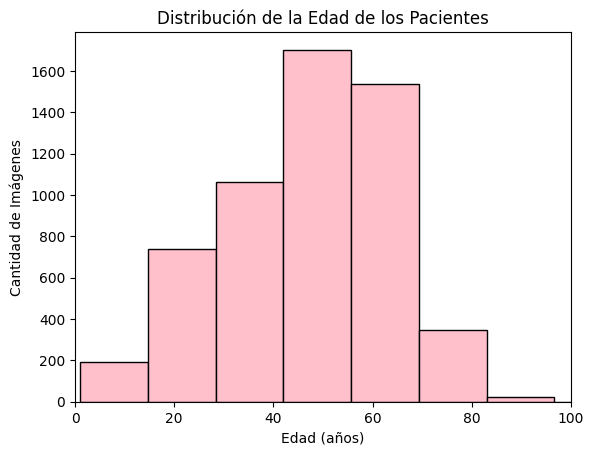

In [ ]:
# Vamos a graficar= 1 Distribución por edad.
import matplotlib.pyplot as plt

plt.hist(df_copy["Patient Age"], bins=30, color="pink", edgecolor="black")
plt.title("Distribución de la Edad de los Pacientes")
plt.xlabel("Edad (años)")
plt.ylabel("Cantidad de Imágenes")
plt.xlim(0,100)


# Mostrar los valores sobre cada barra
#counts, bins, patches = plt.hist(df_copy["Patient Age"], bins=30, color='pink', edgecolor='black')
#for count, bin_left in zip(counts, bins[:-1]):
   # plt.text(bin_left + 3, count + 3, int(count), fontsize=8)

plt.show()

In [ ]:
print(df_copy["Patient Gender"].unique())

['M' 'F']


Patient Gender
M    55.9
F    44.1
Name: proportion, dtype: float64


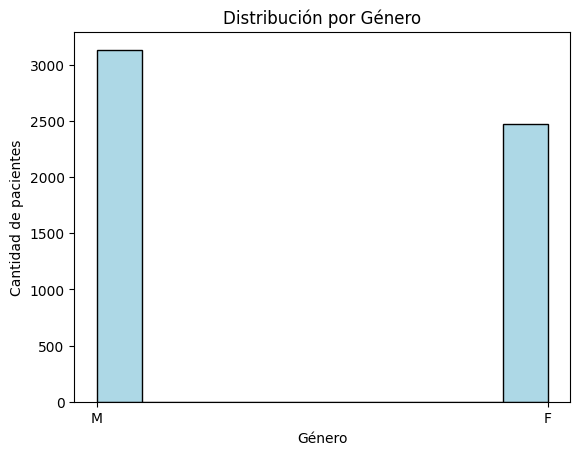

In [ ]:
# Distribución por Género
print((df_copy["Patient Gender"].value_counts(normalize=True)*100).round(2))
plt.hist(df_copy["Patient Gender"], bins=10, color="lightblue", edgecolor="black")
plt.title("Distribución por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de pacientes")
plt.show()

Finding Labels
No Finding                                   3044
Infiltration                                  503
Effusion                                      203
Atelectasis                                   192
Nodule                                        144
                                             ... 
Cardiomegaly|Consolidation|Infiltration         1
Emphysema|Pleural_Thickening|Pneumothorax       1
Atelectasis|Consolidation|Effusion|Mass         1
Consolidation|Effusion|Pneumonia                1
Cardiomegaly|Effusion|Emphysema                 1
Name: count, Length: 244, dtype: int64


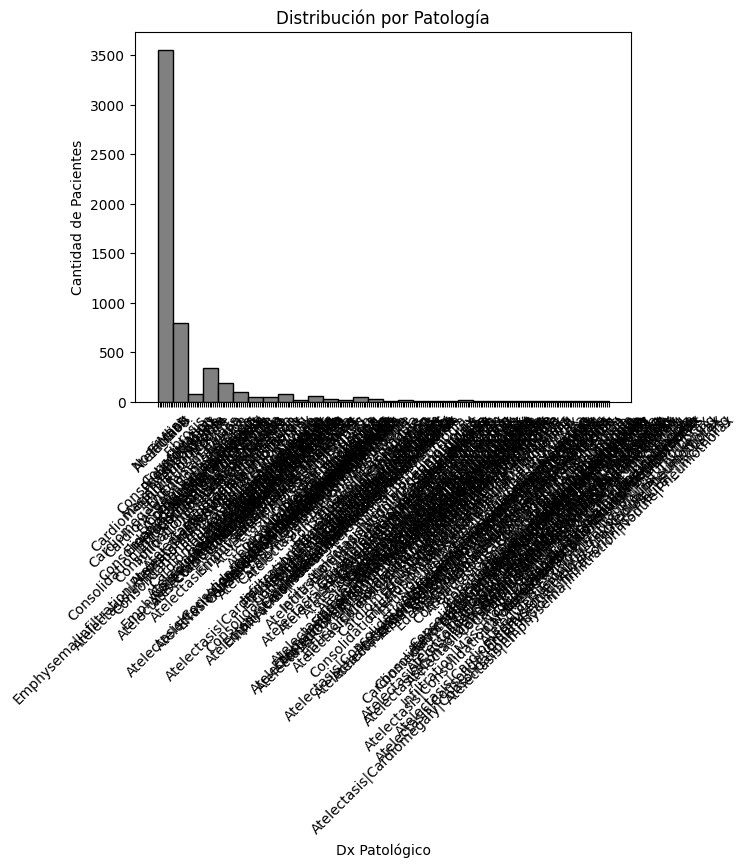

In [ ]:
#Vamos por el otro gráfico: Distribución por patologías  pero tendremos problemas siendo que son muchas categorias.

print(df_copy["Finding Labels"].value_counts())
plt.hist(df_copy["Finding Labels"], bins=30, color="grey", edgecolor="black")

plt.title("Distribución por Patología")
plt.xlabel("Dx Patológico")
plt.ylabel("Cantidad de Pacientes")
plt.xticks(rotation=45)

plt.show()

{'No Finding': 3044, 'Infiltration': 967, 'Effusion': 644, 'Atelectasis': 508, 'Nodule': 313, 'Mass': 284, 'Pneumothorax': 271, 'Consolidation': 226, 'Pleural_Thickening': 176, 'Cardiomegaly': 141}


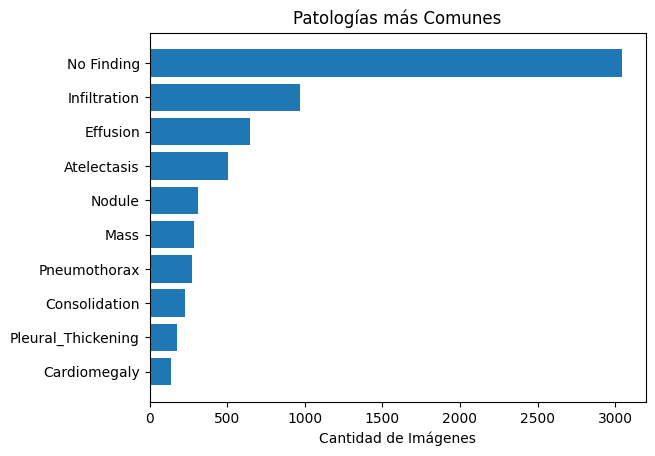

In [ ]:
# Entonces debemos plantearlo de una manera distinta.
# Conteo de hallazgos mas comunes
# El método Counter es mejor que value_counts para esto. Ademas tenemos que separar los que estan con diagnostico múltiple.
# Luego debemos ver los 10 mas comunes para así graficar.

from collections import Counter

# 1. Separar cada etiqueta de hallazgo.
hallazgos= df['Finding Labels'].str.split("|").sum()

#2.Contar cuantas veces aparece cada hallazgo

conteo= Counter(hallazgos)

# 3. Tomar los 10 más comunes
conteo_mas_comunes= dict(conteo.most_common(10))
print(conteo_mas_comunes)

#4.Graficar

plt.barh(list(conteo_mas_comunes.keys()), list(conteo_mas_comunes.values()))
plt.title("Patologías más Comunes")
plt.xlabel("Cantidad de Imágenes")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#ETAPA 2 . CLASIFICAR RX COMO NORMALES O CON HALLAZGOS . CATEGORICAS BINARIAS
# Primero hay que crear una columna categorica binaria . No finding = 1 other results = 0

df_copy["Normal"]=df_copy['Finding Labels'].apply(lambda x: 1 if x == "No Finding" else 0 )
print(df_copy.head(5))

        Image Index                                     Finding Labels  \
0  00000013_005.png  Emphysema|Infiltration|Pleural_Thickening|Pneu...   
1  00000013_026.png                             Cardiomegaly|Emphysema   
2  00000017_001.png                                         No Finding   
3  00000030_001.png                                        Atelectasis   
4  00000032_001.png                        Cardiomegaly|Edema|Effusion   

   Patient ID  Patient Age Patient Gender View Position  Normal  
0          13           60              M            AP       0  
1          13           57              M            AP       0  
2          17           77              M            AP       1  
3          30           79              M            PA       0  
4          32           55              F            AP       0  


<ipython-input-19-41917050>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["Normal"]=df_copy['Finding Labels'].apply(lambda x: 1 if x == "No Finding" else 0 )


In [ ]:
# Creamos sin querer otra columna asi que hay que borrarla

#df_copy= df_copy.drop(columns=["Normal/No Normal"])
display(df_copy.head())

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position,Normal
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,13,60,M,AP,0
1,00000013_026.png,Cardiomegaly|Emphysema,13,57,M,AP,0
2,00000017_001.png,No Finding,17,77,M,AP,1
3,00000030_001.png,Atelectasis,30,79,M,PA,0
4,00000032_001.png,Cardiomegaly|Edema|Effusion,32,55,F,AP,0


In [ ]:
# Etapa 2 Balancear el Dataset. Para evitar que el modelo aprenda solo una clase.
#Seleccionamos 100 normales y 100 anormales.

normales= df_copy[df_copy["Normal"] == 1].sample(100, random_state =42)
anormales= df_copy[df_copy["Normal"] == 0].sample(100, random_state = 42)

df_balanceado= pd.concat([normales, anormales]).reset_index(drop=True)

In [ ]:
#Vamos a cargar las imágenes para ajustarlas .

import os
from PIL import Image
import numpy as np

# Ruta correcta donde estan las imagenes.

image_dir = "./chest_xray_sample/sample/sample/images/"
image_size = (128,128)

imagenes= []
etiquetas = []

# Recorremos las filas del Dataframe balanceado.

for _, fila in df_balanceado.iterrows():
  nombre_imagen = fila["Image Index"]
  ruta_completa = os.path.join(image_dir, nombre_imagen)

  try:
    #Abrimos en escala de grises, redimensionamos , normalizamos

    img = Image.open(ruta_completa).convert ("L")
    img= img.resize(image_size)
    img_array = np.array(img) / 255.0

    imagenes.append(img_array)
    etiquetas.append(fila["Normal"])
  except Exception as e:
    print(f"Error con la imagen{nombre_imagen}: {e}")

In [ ]:
# Convertir a arrays Numpy para el modelo

import numpy as np

# Convertimos la lista de imágenes a array numPy

X = np.array(imagenes).reshape(-1, 128,128 , 1) # agregamos canal (grises)

#Convertimos las etiquetas (0  o 1 ) a array

y= np.array(etiquetas)


In [ ]:
# Etapa siguiente : Separar en entrenamiento y test
#Usamos la funcion train-test-split  y scikitlearn

from sklearn.model_selection import train_test_split

#Separar 80% entrenamiento y 20% test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y) #stratify es para mantener el balance de clases en ambos sets

In [ ]:
#Vamos a realizar una CNN basica usando keras en tensorflow para clasificar ( es un modelo que no es representativo por tener pocas muestras)

#Crear CNN simple

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Arquitectura del modelo.

modelo = Sequential([
    Conv2D(16,(3,3),activation = "relu", input_shape=(128,128,1)), #16 aprende patrones simples, 16 es liviano
    MaxPooling2D(2,2),
    Conv2D(32,(3,3), activation = "relu",),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation ="relu"), #64 por que es un numero bueno para entrenar modelos simples
    Dropout(0.5), #para apagar las mitad de neuranas en este caso evitar el overfitting
    Dense(1, activation = "sigmoid") #salida binaria
])

#Compilar el modelo y seleccionar loss y optimizador

modelo.compile(optimizer = "adam",
               loss= "binary_crossentropy",
               metrics= ["accuracy"])

# Resumen de la arquitectura
modelo.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,843,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,848,129 (7.05 MB)

 Trainable params: 1,848,129 (7.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(asdga12

SyntaxError: incomplete input (<ipython-input-26-2199761973>, line 1)

In [ ]:
# Etapa siguiente : vamos a entrenar el modelo

#nro de epochs usaremos 10 y batchs de 16 imagenes por grupo.

historial = modelo.fit(
    X_train, y_train,
    epochs = 15,
    batch_size = 16,
    validation_data=(X_test, y_test)
)

In [ ]:
#Veremos si el modelo aprende bien o si hay over o underfiting
import matplotlib.pyplot as plt

plt.plot(historial.history["accuracy"], label= "Entrenamiento")
plt.plot(historial.history["val_accuracy"], label= "Validación")
plt.title("Precision del modelo")
plt.xlabel ("Iteraciones")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Pérdida (Loss) del modelo')
plt.xlabel('Iteraciones')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 📦 Importamos las librerías necesarias (vuelvo a agregarlas pero en caso de tenerlas no es necesario.)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping # Es para realizar el stop para evitar sobre ajuste
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ✅ Definimos el modelo (igual que antes)
modelo = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,1)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ✅ Data Augmentation . Para evitar sobrejuste por tener pocos datos.
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

# ✅ Entrenamiento con augmentation
historial = modelo.fit(
    datagen.flow(X_train, y_train, batch_size=16),
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

# ✅ Graficar curvas de accuracy y loss
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(historial.history['accuracy'], label='Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Validación')
plt.title('Accuracy')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss
plt.subplot(1, 2, 2)
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()


In [ ]:
# 📦 Instalamos e importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# 📂 Preparamos los datos (vos ya tenés X_train, X_test, y_train, y_test)
# Importante: las imágenes deben tener 3 canales (RGB) para ResNet
X_train_resnet = np.repeat(X_train, 3, axis=-1)  # pasar de (128,128,1) a (128,128,3)
X_test_resnet = np.repeat(X_test, 3, axis=-1)

# Redimensionar por si acaso (aseguramos el shape correcto)
X_train_resnet = X_train_resnet.reshape(-1, 128, 128, 3)
X_test_resnet = X_test_resnet.reshape(-1, 128, 128, 3)

# 📊 Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_resnet)

# 🔧 EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 🔬 Transfer Learning: ResNet50 preentrenado
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# 🔒 Congelamos las primeras capas (solo ajustamos las últimas)
for layer in base_model.layers:
    layer.trainable = False

# 🏗️ Agregamos nuestras capas arriba de ResNet
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

modelo = Model(inputs=base_model.input, outputs=predictions)

modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 🚀 Entrenamos el modelo
historial = modelo.fit(
    datagen.flow(X_train_resnet, y_train, batch_size=16),
    epochs=30,
    validation_data=(X_test_resnet, y_test),
    callbacks=[early_stop]
)

# 📈 Graficamos
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(historial.history['accuracy'], label='Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Validación')
plt.title('Accuracy')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()


In [ ]:
# VAMOS A REALIZAR UN CAMBIO PARA VER SI PODEMOS MEJORAR EL MODELO HACIENDO CURACION DE LOS DATOS. NOS ENFOCAREMOS EN SOLO RX NORMALES VS LAS QUE PRESENTAN INFILTRACION.
# 📦 Importar librerías
#import pandas as pd
#import numpy as np
#import os

# 📂 Cargar tu CSV de etiquetas
#df = pd.read_csv('./chest_xray_sample/sample/sample_labels.csv')

# 👀 Verificar datos únicos en el campo Finding Labels
print("Etiquetas únicas:", df_copy['Finding Labels'].unique())

# 🔎 Filtramos solo casos de 'Infiltration' y 'No Finding'
df_filtrado = df_copy[df_copy['Finding Labels'].isin(['Effusion', 'No Finding'])]

# ✅ Creamos la nueva columna binaria para ML
# 1 = Infiltration, 0 = No Finding
df_filtrado['Label'] = np.where(df_filtrado['Finding Labels'] == 'Effusion', 1, 0)

# 👀 Ver distribución de clases antes de balancear
print("\nDistribución antes del balanceo:")
print(df_filtrado['Label'].value_counts())

# 🔧 Balanceamos el dataset
# Seleccionamos la cantidad mínima entre ambas clases
min_count = df_filtrado['Label'].value_counts().min()

# Muestreamos al azar para balancear
df_Effusion = df_filtrado[df_filtrado['Label'] == 1].sample(min_count, random_state=42)
df_no_finding = df_filtrado[df_filtrado['Label'] == 0].sample(min_count, random_state=42)

# Concatenamos ambos grupos balanceados
df_balanceado = pd.concat([df_Effusion, df_no_finding]).reset_index(drop=True)

# ✅ Verificamos que quedó balanceado
print("\nDataset balanceado final:")
print(df_balanceado['Label'].value_counts())

# 🚩 Guardamos el nuevo dataset filtrado y balanceado
df_balanceado.to_csv('dataset_Effusion_vs_normal.csv', index=False)

# ✅ Lista de imágenes final para el nuevo modelo
print("\nMuestras finales listas para el modelo:")
print(df_balanceado.head())
display(df_balanceado.head(10))

Etiquetas únicas: ['Emphysema|Infiltration|Pleural_Thickening|Pneumothorax'
 'Cardiomegaly|Emphysema' 'No Finding' 'Atelectasis'
 'Cardiomegaly|Edema|Effusion' 'Consolidation|Mass' 'Effusion'
 'Consolidation|Effusion|Infiltration|Nodule' 'Mass' 'Mass|Pneumothorax'
 'Cardiomegaly|Consolidation' 'Consolidation' 'Pneumothorax'
 'Consolidation|Pleural_Thickening' 'Infiltration|Nodule' 'Fibrosis'
 'Infiltration' 'Emphysema'
 'Atelectasis|Infiltration|Mass|Pleural_Thickening' 'Emphysema|Mass'
 'Emphysema|Pneumothorax' 'Emphysema|Infiltration'
 'Consolidation|Effusion|Infiltration' 'Consolidation|Fibrosis'
 'Fibrosis|Pleural_Thickening' 'Effusion|Infiltration' 'Nodule'
 'Mass|Pleural_Thickening' 'Infiltration|Pleural_Thickening'
 'Pleural_Thickening' 'Consolidation|Infiltration|Pneumothorax'
 'Cardiomegaly|Effusion' 'Atelectasis|Consolidation|Effusion'
 'Fibrosis|Infiltration' 'Atelectasis|Effusion|Infiltration'
 'Edema|Fibrosis' 'Edema' 'Cardiomegaly'
 'Emphysema|Infiltration|Pleural_Thicken

<ipython-input-27-3173218016>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Label'] = np.where(df_filtrado['Finding Labels'] == 'Effusion', 1, 0)


,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position,Normal,Label
0,00001816_001.png,Effusion,1816,65,M,PA,0,1
1,00001301_047.png,Effusion,1301,58,F,AP,0,1
2,00014253_051.png,Effusion,14253,61,M,AP,0,1
3,00010772_007.png,Effusion,10772,70,M,PA,0,1
4,00009608_014.png,Effusion,9608,30,M,AP,0,1
5,00006626_006.png,Effusion,6626,29,F,PA,0,1
6,00017753_031.png,Effusion,17753,63,M,AP,0,1
7,00022883_006.png,Effusion,22883,67,M,AP,0,1
8,00029567_001.png,Effusion,29567,57,F,PA,0,1
9,00025746_005.png,Effusion,25746,59,M,AP,0,1


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 92s 4s/step - accuracy: 0.5013 - loss: 0.7524 - val_accuracy: 0.5000 - val_loss: 0.6952
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.4645 - loss: 0.7382 - val_accuracy: 0.5000 - val_loss: 0.6968
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.4397 - loss: 0.7224 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.5445 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.5387 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.3960 - loss: 0.6966 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.5267 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.4504 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss:

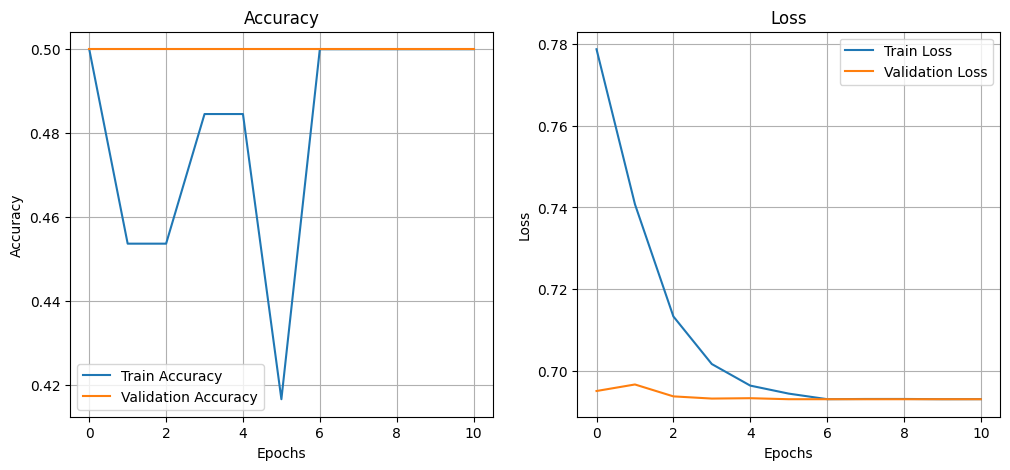

In [ ]:
# AHORA VAMOS A APLICAR EL TRANFERS LEARNING EN EL NUEVO DATASET DONDE SOLO TENEMOS ESTAS 2 CATEGORIAS.
# 📦 Importar librerías

import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# ✅ Parámetros
IMG_SIZE = 224  # ResNet50 prefiere imágenes de 224x224

# 📂 Cargar el CSV balanceado
df = pd.read_csv('dataset_Effusion_vs_normal.csv')

# 📊 Leer las imágenes y preparar X e y
X = []
y = []

image_dir = './chest_xray_sample/sample/sample/images/'

for idx, row in df.iterrows():
    img_path = os.path.join(image_dir, row['Image Index'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)
    X.append(img_rgb)
    y.append(row['Label'])

X = np.array(X) / 255.0
y = np.array(y)

# ✅ Separar en train-test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ✅ Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# ✅ EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ✅ Transfer Learning con ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

modelo = Model(inputs=base_model.input, outputs=predictions)
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Entrenamiento
historial = modelo.fit(
    datagen.flow(X_train, y_train, batch_size=16),
    epochs=30,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

# ✅ Graficar resultados
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(historial.history['accuracy'], label='Train Accuracy')
plt.plot(historial.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(historial.history['loss'], label='Train Loss')
plt.plot(historial.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()


Esto es lo que vamos a realizar para aumentar la base de datos para entrenar el modelo
1️⃣ Descargar el modelo CheXNet (preentrenado).
2️⃣ Adaptarlo a tu problema binario actual (Effusion vs Normal).
3️⃣ Aplicar fine-tuning sobre tu dataset balanceado actual (503 vs 503).
4️⃣ Observar la mejora de accuracy y loss.
5️⃣ Dejarlo listo para ser "proyecto de portfolio".

In [ ]:
display(df_balanceado)

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position,Normal,Label
0,00001816_001.png,Effusion,1816,65,M,PA,0,1
1,00001301_047.png,Effusion,1301,58,F,AP,0,1
2,00014253_051.png,Effusion,14253,61,M,AP,0,1
3,00010772_007.png,Effusion,10772,70,M,PA,0,1
4,00009608_014.png,Effusion,9608,30,M,AP,0,1
...,...,...,...,...,...,...,...,...
401,00017454_003.png,No Finding,17454,47,F,AP,1,0
402,00017704_001.png,No Finding,17704,58,F,PA,1,0
403,00006195_007.png,No Finding,6195,37,M,AP,1,0
404,00016051_021.png,No Finding,16051,30,F,PA,1,0


🔬 QUÉ VAMOS A HACER HOY
🔧 Etapa 1: Preparar el entorno (PyTorch + dependencias)

🔧 Etapa 2: Preparar los datos (cargarlos al formato PyTorch)

🔧 Etapa 3: Descargar CheXNet preentrenado

🔧 Etapa 4: Adaptar CheXNet a tu problema (fine-tuning)

🔧 Etapa 5: Entrenar el modelo y analizar resultados


In [ ]:
# Etapa 1 : Preparación del Entorno
# Librerias instalamos
# ⚠️ IMPORTANTE: esto lo corrés UNA sola vez al principio en una celda de Colab

!pip install torch torchvision --quiet
!pip install timm --quiet  # librería de modelos preentrenados modernos (incluye DenseNet)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.1 MB/s eta 0:00:00


In [ ]:
#PyTorch trabaja con algo llamado Dataset y DataLoader.

# Acá transformamos tus datos y tus imágenes:

import pandas as pd
import numpy as np
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

# Leemos tu dataframe
df = df_balanceado.copy()

# Ruta a tus imágenes
image_dir = './chest_xray_sample/sample/sample/images/'

# Definimos el tamaño que espera CheXNet
IMG_SIZE = 224

# Dataset personalizado
class ChestXrayDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.df = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.iloc[idx]['Image Index']
        label = self.df.iloc[idx]['Label']

        img_path = os.path.join(self.image_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)  # convertimos a 3 canales

        if self.transform:
            img_rgb = self.transform(img_rgb)

        return img_rgb, torch.tensor(label).float()

# Transformaciones para PyTorch (normalizamos como espera DenseNet)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Dividimos train/test (80% - 20%)
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['Label'], random_state=42)

train_dataset = ChestXrayDataset(train_df, image_dir, transform)
test_dataset = ChestXrayDataset(test_df, image_dir, transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [ ]:
# ETAPA 3 CARGAR CheXNet (este usa DenseNet121)
# 📦 Primero (si todavía no lo hiciste en el entorno)
#!pip install timm --quiet

# 📂 Importamos todo lo necesario
import timm
import torch
import torch.nn as nn

# ✅ Cargamos DenseNet121 preentrenado en ImageNet (es el mismo backbone que usa CheXNet)
model = timm.create_model('densenet121', pretrained=True)

# ✅ Modificamos la última capa para clasificación binaria (Effusion vs Normal)
model.classifier = nn.Sequential(
    nn.Linear(model.classifier.in_features, 1),  # salida binaria
    nn.Sigmoid()  # activación para probabilidad
)

# ✅ Detectamos si tenemos GPU disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# ✅ Enviamos el modelo al dispositivo (GPU o CPU)
model = model.to(device)

# ✅ Confirmamos arquitectura final
print(model)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/32.3M [00:00<?, ?B/s]

Usando dispositivo: cpu
DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNormAct2d(
      64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): ReLU(inplace=True)
    )
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): DenseBlock(
      (denselayer1): DenseLayer(
        (norm1): BatchNormAct2d(
          64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNormAct2d(
          128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [34]:
# Etapa 4 : que haremos ?
#Definimos Criterios de Perdida
#Definimos optimizador usar
#Hacemos el bucle de entrenamiento: Entrenamos por batches y calculamos el loss, la tasa de aprendizaje y el accuracy por epoch.
import torch.optim as optim

# ✅ Definimos la función de pérdida (binary cross-entropy)
criterion = nn.BCELoss()

# ✅ Definimos el optimizador (Adam es buena práctica para fine-tuning)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ✅ Empezamos el ciclo de entrenamiento
num_epochs = 10  # empezamos con 10, luego podemos subir

for epoch in range(num_epochs):
    model.train()  # poner el modelo en modo entrenamiento

    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculamos accuracy de entrenamiento
        preds = (outputs > 0.5).float()
        total_correct += (preds == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    avg_loss = running_loss / len(train_loader)

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f} - Train Accuracy: {train_acc:.4f}")


Epoch 1/10 - Loss: 0.3418 - Train Accuracy: 0.9074
Epoch 2/10 - Loss: 0.1826 - Train Accuracy: 0.9846
Epoch 3/10 - Loss: 0.1604 - Train Accuracy: 0.9938
Epoch 4/10 - Loss: 0.1093 - Train Accuracy: 0.9877
Epoch 5/10 - Loss: 0.0818 - Train Accuracy: 0.9938
Epoch 6/10 - Loss: 0.0905 - Train Accuracy: 0.9877
Epoch 7/10 - Loss: 0.0477 - Train Accuracy: 0.9969
Epoch 8/10 - Loss: 0.0340 - Train Accuracy: 1.0000
Epoch 9/10 - Loss: 0.0315 - Train Accuracy: 1.0000
Epoch 10/10 - Loss: 0.0348 - Train Accuracy: 0.9938


In [35]:
#ETAPA 5 VER SI TIENE OVERFITTING REALIZANDO LA PUEBA CON LA VALIDACION
# 🔬 Ponemos el modelo en modo evaluación (importantísimo en PyTorch)
model.eval()

# 🔧 Inicializamos contadores
correct = 0
total = 0

# ✅ No calculamos gradientes en test → más eficiente
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device).unsqueeze(1)
        outputs = model(images)
        preds = (outputs > 0.5).float()
        correct += (preds == labels).sum().item()
        total += labels.size(0)

# 🎯 Calculamos el accuracy en test
test_acc = correct / total
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.7805


In [36]:
from sklearn.metrics import confusion_matrix, classification_report

# ✅ Calculamos predicciones sobre test completo
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device).unsqueeze(1)
        outputs = model(images)
        preds = (outputs > 0.5).int().cpu().numpy()
        labels = labels.cpu().numpy()

        all_preds.extend(preds)
        all_labels.extend(labels)

# ✅ Generamos la matriz de confusión
cm = confusion_matrix(all_labels, all_preds)
print("Matriz de Confusión:")
print(cm)

# ✅ Reporte profesional completo
print("\nReporte profesional:")
print(classification_report(all_labels, all_preds, target_names=['Normal', 'Effusion']))


Matriz de Confusión:
[[34  7]
 [11 30]]

Reporte profesional:
              precision    recall  f1-score   support

      Normal       0.76      0.83      0.79        41
    Effusion       0.81      0.73      0.77        41

    accuracy                           0.78        82
   macro avg       0.78      0.78      0.78        82
weighted avg       0.78      0.78      0.78        82

